In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Display settings
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [2]:
customers = pd.read_csv("D:\\customers_data.csv")
loans = pd.read_csv("D:\\loans_data.csv")
payments = pd.read_csv("D:\\payments_data.csv")
transactions = pd.read_csv("D:\\transictions_data.csv")
acounts = pd.read_csv("D:\\account_data.csv")

In [3]:
print(customers.shape, loans.shape, payments.shape, transactions.shape)
customers.head()

(15000, 7) (12000, 8) (209398, 6) (15000, 7)


,customer_id,name,gender,city,signup_date,annual_income,credit_score
0,1,Sai Sharma,M,Kolkata,2019-12-11,200000,768
1,2,Neha Kulkarni,F,Hyderabad,2017-08-16,400000,650
2,3,Ishita Patel,F,Hyderabad,2024-02-03,200000,585
3,4,Sai Saxena,F,Pune,2016-07-02,600000,669
4,5,Aditya Malhotra,M,Bengaluru,2017-12-08,200000,646


In [4]:
# Step 3: Handle missing values and check data types
print(customers.info())
print(loans.info())
print(payments.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    15000 non-null  int64 
 1   name           15000 non-null  object
 2   gender         15000 non-null  object
 3   city           15000 non-null  object
 4   signup_date    15000 non-null  object
 5   annual_income  15000 non-null  int64 
 6   credit_score   15000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 820.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loan_id        12000 non-null  int64  
 1   customer_id    12000 non-null  int64  
 2   loan_type      12000 non-null  object 
 3   loan_amount    12000 non-null  int64  
 4   interest_rate  12000 non-null  float64
 5   start_date     12000 non-nu

In [5]:
# Drop duplicates if any
customers.drop_duplicates(inplace=True)
loans.drop_duplicates(inplace=True)
payments.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)
acounts.drop_duplicates(inplace=True)

In [6]:
# Convert date columns
date_columns = ['loan_start_date', 'payment_date', 'transaction_date']
for df in [loans, payments, transactions]:
    for col in df.columns:
        if 'date' in col.lower():
            df[col] = pd.to_datetime(df[col], errors='coerce')

In [7]:
# Combine loan, payment, and customer info
merged_df = loans.merge(customers, on='customer_id', how='left')
merged_df = merged_df.merge(payments, on='loan_id', how='left')

print(merged_df.shape)
merged_df.head()

(209811, 19)


,loan_id,customer_id,loan_type,loan_amount,interest_rate,start_date,term_months,status,name,gender,city,signup_date,annual_income,credit_score,payment_id,payment_date,amount_paid,remaining_balance,payment_status
0,1,5514,personal,333485,8.83,2019-02-26,36,defaulted,Meera Jain,F,Mumbai,2019-08-28,1500000,711,1.0,2019-03-28,10505.74,325433.15,paid
1,1,5514,personal,333485,8.83,2019-02-26,36,defaulted,Meera Jain,F,Mumbai,2019-08-28,1500000,711,2.0,2019-04-27,10049.82,317777.98,paid
2,1,5514,personal,333485,8.83,2019-02-26,36,defaulted,Meera Jain,F,Mumbai,2019-08-28,1500000,711,3.0,2019-05-27,11202.28,308914.02,paid
3,1,5514,personal,333485,8.83,2019-02-26,36,defaulted,Meera Jain,F,Mumbai,2019-08-28,1500000,711,4.0,2019-06-26,10419.35,300767.76,paid
4,1,5514,personal,333485,8.83,2019-02-26,36,defaulted,Meera Jain,F,Mumbai,2019-08-28,1500000,711,5.0,2019-07-26,10507.21,292473.70,paid


In [8]:
# Summary statistics
merged_df.describe()

,loan_id,customer_id,loan_amount,interest_rate,start_date,term_months,annual_income,credit_score,payment_id,payment_date,amount_paid,remaining_balance
count,209811.000000,209811.000000,2.098110e+05,209811.000000,209811,209811.000000,2.098110e+05,209811.000000,209398.000000,209398,209398.000000,2.093980e+05
mean,5993.547097,7438.965259,4.781869e+05,11.211966,2021-06-10 01:20:15.991535104,46.502424,5.238805e+05,680.329301,104699.500000,2022-10-07 17:41:15.015042816,14280.711749,3.248912e+05
min,1.000000,4.000000,2.000000e+04,7.500000,2017-01-01 00:00:00,12.000000,2.000000e+05,465.000000,1.000000,2017-01-31 00:00:00,0.000000,0.000000e+00
25%,2974.000000,3702.500000,2.034370e+05,9.350000,2019-03-29 00:00:00,36.000000,3.000000e+05,639.000000,52350.250000,2020-06-19 00:00:00,5396.520000,1.179005e+05
50%,6007.000000,7354.000000,3.113810e+05,11.150000,2021-06-25 00:00:00,48.000000,5.000000e+05,680.000000,104699.500000,2022-10-11 00:00:00,9271.915000,2.101242e+05
75%,8986.000000,11219.000000,6.987790e+05,13.060000,2023-08-26 00:00:00,60.000000,6.000000e+05,721.000000,157048.750000,2024-12-28 00:00:00,19561.092500,4.558509e+05
max,12000.000000,14999.000000,1.901732e+06,15.000000,2025-10-31 00:00:00,84.000000,1.500000e+06,850.000000,209398.000000,2032-09-02 00:00:00,174456.380000,1.876247e+06
std,3469.947293,4316.645186,3.718998e+05,2.167486,NaN,15.893753,2.938095e+05,59.600533,60448.140171,NaN,13176.751449,3.003442e+05


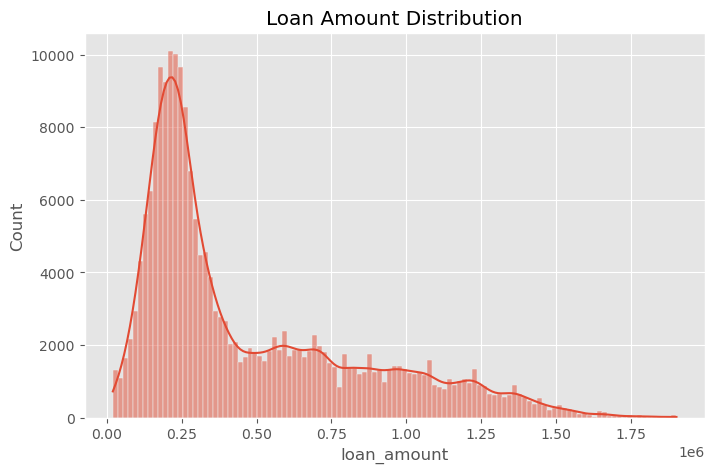

In [9]:
# Plot loan distribution
plt.figure(figsize=(8,5))
sns.histplot(merged_df['loan_amount'], kde=True)
plt.title("Loan Amount Distribution")
plt.show()

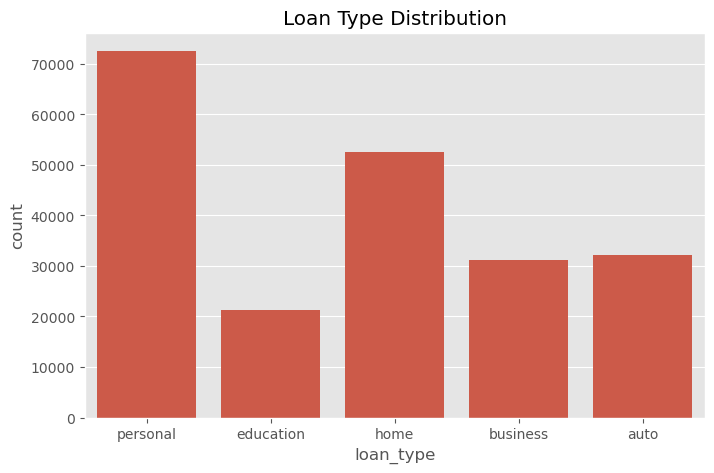

In [10]:
# Count of loan types or regions
plt.figure(figsize=(8,5))
sns.countplot(data=merged_df, x='loan_type')
plt.title("Loan Type Distribution")
plt.show()

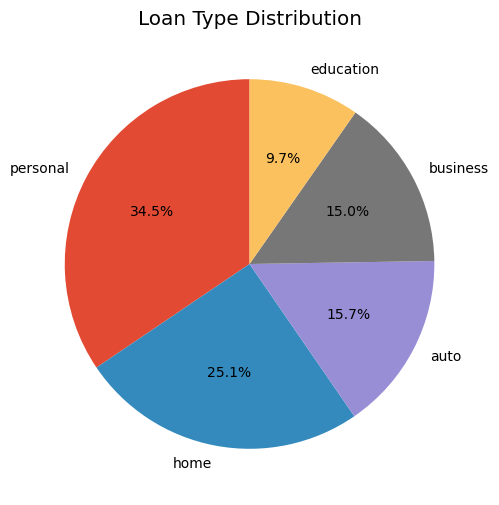

In [11]:
#Loan type share 
loan_type_share = loans['loan_type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(loan_type_share, labels=loan_type_share.index, autopct='%1.1f%%', startangle=90)
plt.title('Loan Type Distribution')
plt.show()

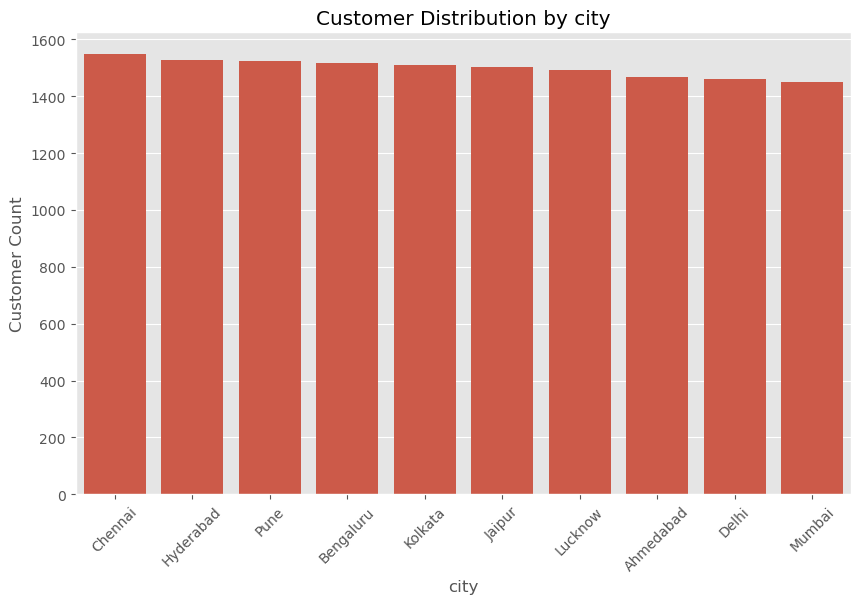

In [13]:
#Customers by region
plt.figure(figsize=(10,6))
sns.countplot(data=customers, x='city', order=customers['city'].value_counts().index)
plt.title('Customer Distribution by city')
plt.xlabel('city')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)
plt.show()

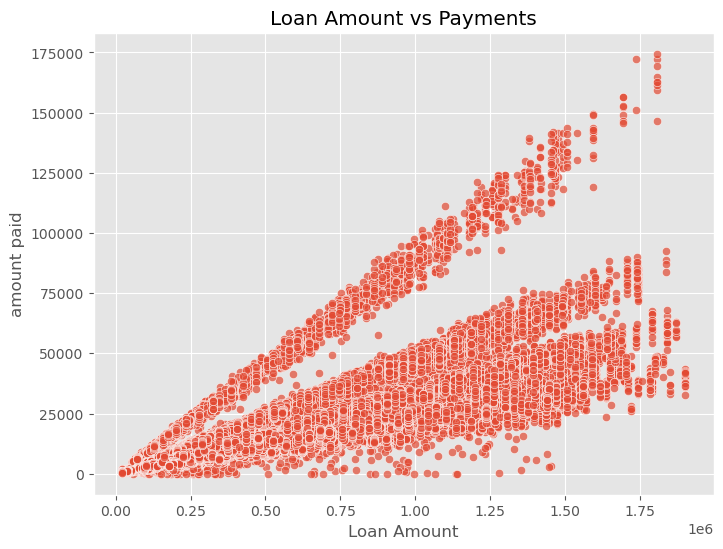

In [16]:

#collection vs loan amount
merged = loans.merge(payments, on='loan_id', how='left')

plt.figure(figsize=(8,6))
sns.scatterplot(data=merged, x='loan_amount', y='amount_paid', alpha=0.7)
plt.title('Loan Amount vs Payments')
plt.xlabel('Loan Amount')
plt.ylabel('amount paid')
plt.show()

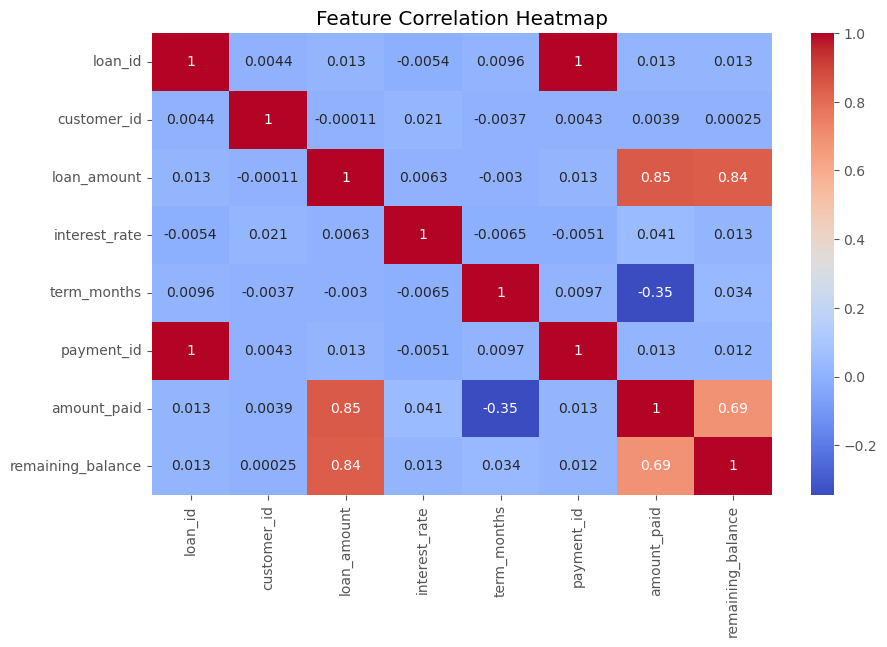

In [17]:
#future heatmap
numeric_cols = merged.select_dtypes('number')
plt.figure(figsize=(10,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

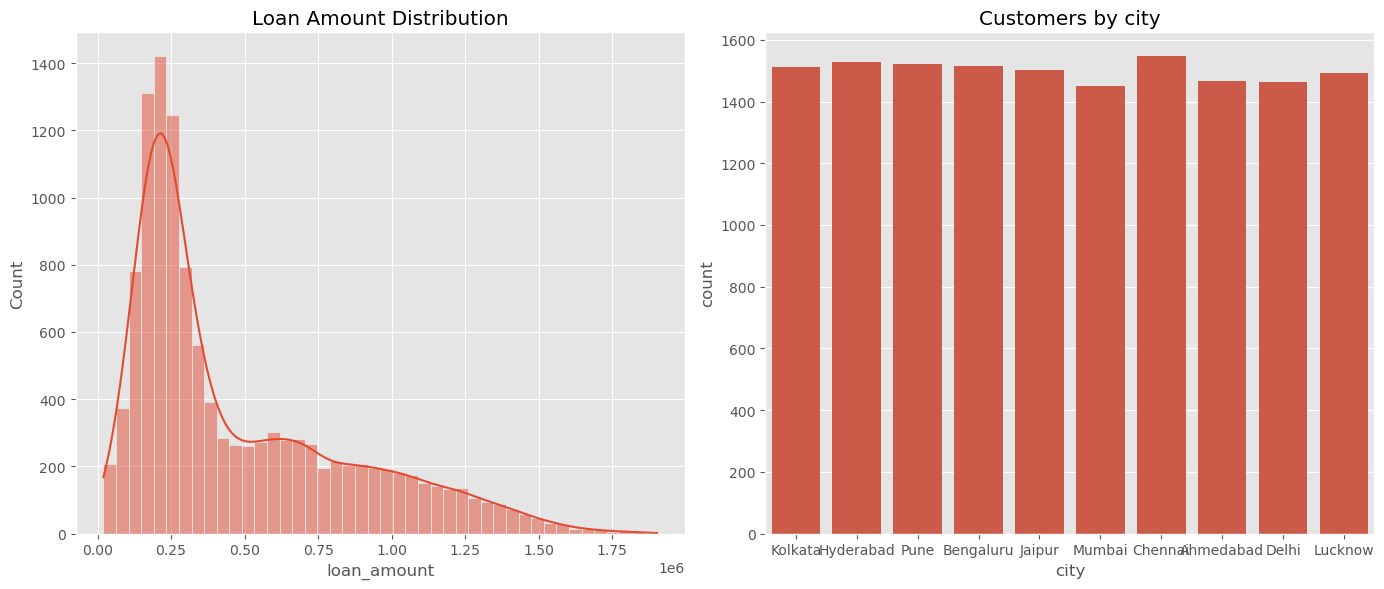

In [19]:
loans distrubution vs customers by city
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.histplot(loans['loan_amount'], kde=True, ax=axes[0])
axes[0].set_title('Loan Amount Distribution')

sns.countplot(data=customers, x='city', ax=axes[1])
axes[1].set_title('Customers by city')
plt.tight_layout()
plt.show()

In [74]:
#customer segmentation using k-means
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [75]:
customers.head()

,customer_id,name,gender,city,signup_date,annual_income,credit_score
0,1,Sai Sharma,M,Kolkata,2019-12-11,200000,768
1,2,Neha Kulkarni,F,Hyderabad,2017-08-16,400000,650
2,3,Ishita Patel,F,Hyderabad,2024-02-03,200000,585
3,4,Sai Saxena,F,Pune,2016-07-02,600000,669
4,5,Aditya Malhotra,M,Bengaluru,2017-12-08,200000,646


In [76]:
merged_df = customers.merge(loans, on='customer_id', how='left')
merged_df = merged_df.merge(transactions, on='customer_id', how='left')

In [79]:
trans_summary = transactions.groupby('customer_id').agg({
    'amount': 'sum',
    'transaction_id': 'count'
}).rename(columns={'amount': 'total_spent', 'transaction_id': 'num_transactions'})

merged_df = customers.merge(trans_summary, on='customer_id', how='left')

In [81]:
merged_df.head()

,customer_id,name,gender,city,signup_date,annual_income,credit_score,total_spent,num_transactions
0,1,Sai Sharma,M,Kolkata,2019-12-11,200000,768,874.0,1.0
1,2,Neha Kulkarni,F,Hyderabad,2017-08-16,400000,650,NaN,NaN
2,3,Ishita Patel,F,Hyderabad,2024-02-03,200000,585,822.0,1.0
3,4,Sai Saxena,F,Pune,2016-07-02,600000,669,9964.0,3.0
4,5,Aditya Malhotra,M,Bengaluru,2017-12-08,200000,646,2997.0,1.0


In [83]:
loan_summary = loans.groupby('customer_id').agg({
    'loan_amount': 'sum',       # total loan amount taken
    'interest_rate': 'mean',    # average interest rate
    'term_months': 'mean'              # average loan term
}).rename(columns={
    'loan_amount': 'total_loan_amount',
    'interest_rate': 'avg_interest_rate',
    'term_months': 'avg_term'
})

In [85]:
merged_df = customers.merge(trans_summary, on='customer_id', how='left')
merged_df = merged_df.merge(loan_summary, on='customer_id', how='left')

In [86]:
merged_df.head()

,customer_id,name,gender,city,signup_date,annual_income,credit_score,total_spent,num_transactions,total_loan_amount,avg_interest_rate,avg_term
0,1,Sai Sharma,M,Kolkata,2019-12-11,200000,768,874.0,1.0,NaN,NaN,NaN
1,2,Neha Kulkarni,F,Hyderabad,2017-08-16,400000,650,NaN,NaN,NaN,NaN,NaN
2,3,Ishita Patel,F,Hyderabad,2024-02-03,200000,585,822.0,1.0,NaN,NaN,NaN
3,4,Sai Saxena,F,Pune,2016-07-02,600000,669,9964.0,3.0,620494.0,14.93,48.0
4,5,Aditya Malhotra,M,Bengaluru,2017-12-08,200000,646,2997.0,1.0,144818.0,8.62,24.0


In [88]:
#feature selection
features = [
    'annual_income',
    'credit_score',
    'total_spent',
    'num_transactions',
    'total_loan_amount',
    'avg_interest_rate',
    'avg_term'
]

# Select only numeric data and handle NaN
cluster_df = merged_df[features].fillna(0)

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_df)

C:\Users\Dell\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Dell\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Dell\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Dell\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^

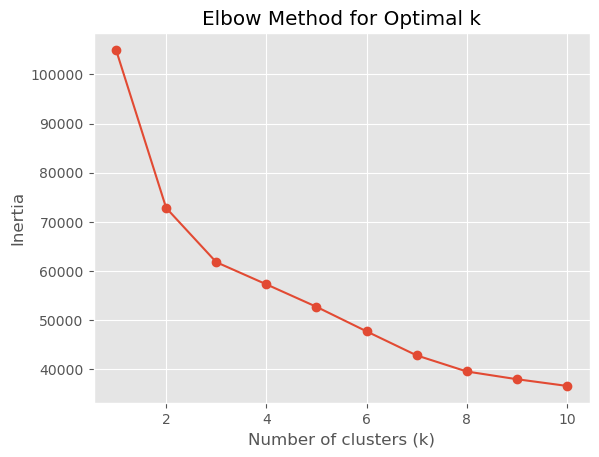

In [90]:
#elbo methos find optimal number of cluster

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [91]:
#apply k-means with optimal k
kmeans = KMeans(n_clusters=4, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(scaled_data)

In [92]:
#analyze the cluster
cluster_summary = merged_df.groupby('Cluster')[features].mean().round(2)
print(cluster_summary)

         annual_income  credit_score  total_spent  num_transactions  \
Cluster                                                               
0            514336.13        678.46      1498.88              1.29   
1            504639.44        683.17      5552.26              2.62   
2            439672.40        635.17      1496.27              1.27   
3            608513.71        724.90      1569.87              1.31   

         total_loan_amount  avg_interest_rate  avg_term  
Cluster                                                  
0                163856.00               8.34     12.00  
1                595066.95              11.10     40.52  
2                652037.54              11.23     43.35  
3                774622.24              11.28     43.96  


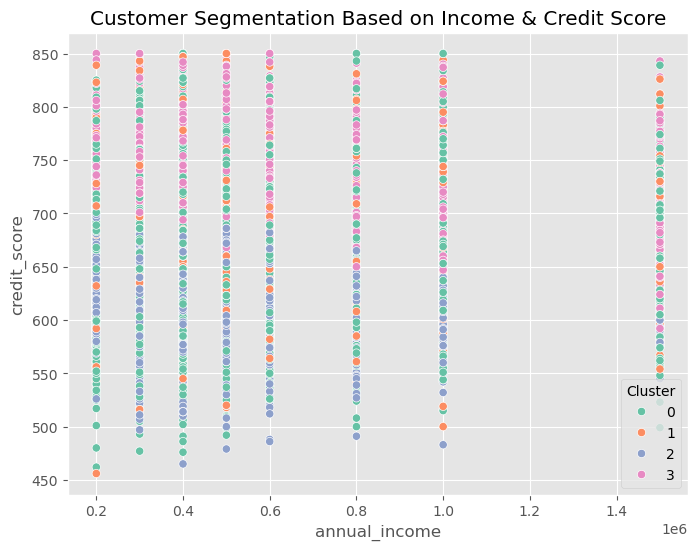

In [93]:
#visualize the cluster
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=merged_df['annual_income'],
    y=merged_df['credit_score'],
    hue=merged_df['Cluster'],
    palette='Set2'
)
plt.title('Customer Segmentation Based on Income & Credit Score')
plt.show()

In [95]:
#automatically leble and describe 
# Compute the mean of each feature by cluster
cluster_summary = merged_df.groupby('Cluster')[[
    'annual_income',
    'credit_score',
    'total_spent',
    'num_transactions',
    'total_loan_amount',
    'avg_interest_rate',
    'avg_term'
]].mean().round(2)

print(" Cluster Summary:")
print(cluster_summary)

 Cluster Summary:
         annual_income  credit_score  total_spent  num_transactions  \
Cluster                                                               
0            514336.13        678.46      1498.88              1.29   
1            504639.44        683.17      5552.26              2.62   
2            439672.40        635.17      1496.27              1.27   
3            608513.71        724.90      1569.87              1.31   

         total_loan_amount  avg_interest_rate  avg_term  
Cluster                                                  
0                163856.00               8.34     12.00  
1                595066.95              11.10     40.52  
2                652037.54              11.23     43.35  
3                774622.24              11.28     43.96  


In [96]:
 #Define labeling logic
def label_cluster(row):
    if row['annual_income'] > 700000 and row['credit_score'] > 700:
        return "High Value / Prime Customers"
    elif row['annual_income'] < 300000 and row['credit_score'] < 600:
        return "At-Risk / Low Credit Customers"
    elif row['total_spent'] > 5000 or row['num_transactions'] > 5:
        return "Active Spenders"
    else:
        return "Moderate / Average Customers"

# Apply labels
cluster_summary['Segment_Label'] = cluster_summary.apply(label_cluster, axis=1)

print("\n Cluster Labels:")
print(cluster_summary[['Segment_Label']])


 Cluster Labels:
                        Segment_Label
Cluster                              
0        Moderate / Average Customers
1                     Active Spenders
2        Moderate / Average Customers
3        Moderate / Average Customers


In [97]:
# Create a mapping from cluster number to segment name
cluster_map = cluster_summary['Segment_Label'].to_dict()

# Add to main DataFrame
merged_df['Segment_Label'] = merged_df['Cluster'].map(cluster_map)

# Preview
merged_df[['customer_id', 'name', 'annual_income', 'credit_score', 'Cluster', 'Segment_Label']].head(10)

,customer_id,name,annual_income,credit_score,Cluster,Segment_Label
0,1,Sai Sharma,200000,768,0,Moderate / Average Customers
1,2,Neha Kulkarni,400000,650,0,Moderate / Average Customers
2,3,Ishita Patel,200000,585,0,Moderate / Average Customers
3,4,Sai Saxena,600000,669,1,Active Spenders
4,5,Aditya Malhotra,200000,646,2,Moderate / Average Customers
5,6,Simran Verma,300000,594,2,Moderate / Average Customers
6,7,Aarav Singh,400000,717,3,Moderate / Average Customers
7,8,Saanvi Kulkarni,400000,680,3,Moderate / Average Customers
8,9,Siddharth Bhat,400000,570,0,Moderate / Average Customers
9,10,Aarav Saxena,400000,772,1,Active Spenders


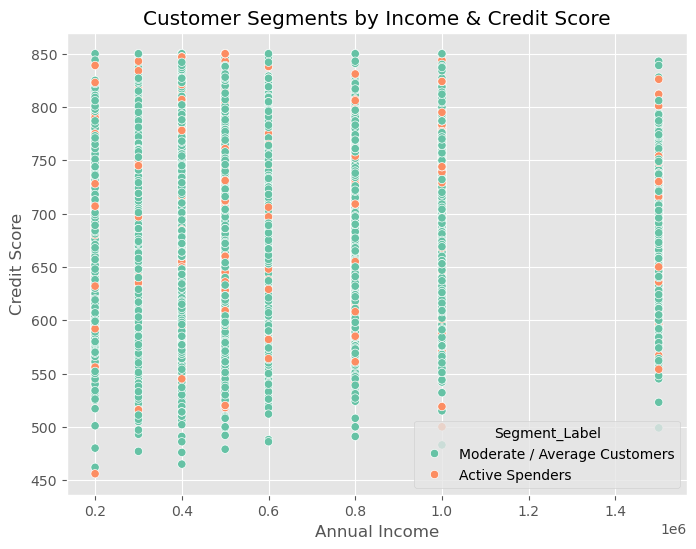

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=merged_df,
    x='annual_income',
    y='credit_score',
    hue='Segment_Label',
    palette='Set2'
)
plt.title('Customer Segments by Income & Credit Score')
plt.xlabel('Annual Income')
plt.ylabel('Credit Score')
plt.show()